In [44]:
import pandas as pd
encodings=['utf-8','latin-1','ISO-8859-1','cp1252']
file_path="spam.csv"
for encoding in encodings:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print(f"File successfully read with encoding {encoding}")
        break
    except:
        print(f"Failed to read file with encoding {encoding}")
        continue
if 'df' in locals():
    print("CSV file has been successfully loaded")
else:
    print("All encodings failed. Unable to read CSV file")

Failed to read file with encoding utf-8
File successfully read with encoding latin-1
CSV file has been successfully loaded


In [45]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Data Cleaning

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [47]:
# Dropping unnamed columns and renaming v1 and v2
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
# Encoding target 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
#Checking missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [50]:
#Checking duplicates
df.duplicated().sum()

403

In [51]:
#Removing duplicates
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


EDA

In [52]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

Text(0.5, 1.0, '% of Ham and Spam SMS')

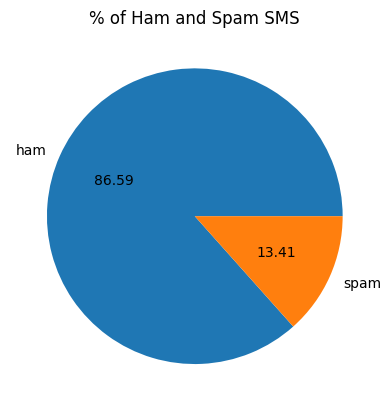

In [53]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.title("% of Ham and Spam SMS")

In [54]:
# !pip install nltk
import nltk
# nltk.download('all')

In [55]:
#No. of characters
df["num_characters"]=df["text"].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [56]:
#No. of words
df["num_words"] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [57]:
#No. of Sentences
df["num_sentences"] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [58]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [59]:
#Targetting ham
df[df['target']==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
#Targetting spam
df[df['target']==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


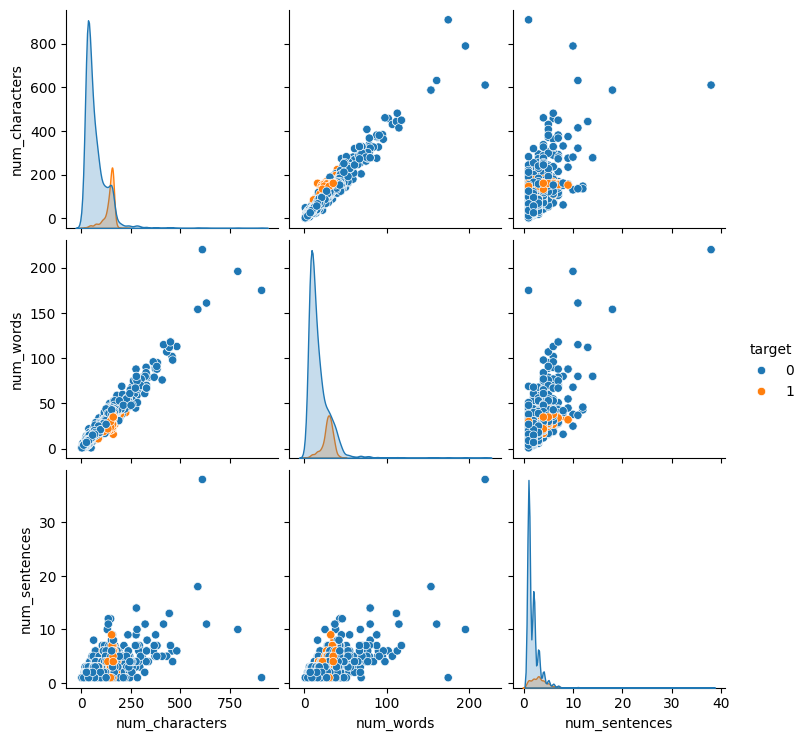

In [61]:
import seaborn as sns
sns.pairplot(df,hue='target')

C:\Users\HP\AppData\Local\Temp\ipykernel_15928\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

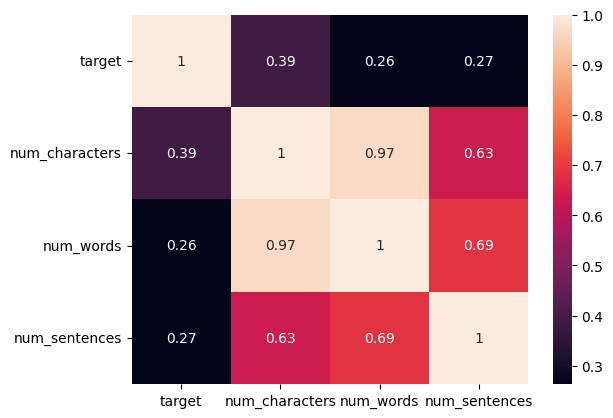

In [62]:
sns.heatmap(df.corr(),annot=True)

Data Preprocessing

In [63]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

ps=PorterStemmer()

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    processed_text = [ps.stem(word) for word in text if word.isalnum() and word not in stop_words]   #Filtering out non alpha numeric and stop words and performing stemming
    return " ".join(processed_text)

In [64]:
transform_text("I'm Prakriti and my mail is prakriti@gmail.com.")

'prakriti mail prakriti'

In [65]:
# def test(text):
#     text=text.lower()
#     text=nltk.word_tokenize(text)
#     y=[]
#     for i in text:
#         if i.isalnum():
#             y.append(i)
#     text=y[:]
#     y.clear()

#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)

#     text=y[:]
#     y.clear()

#     for i in text:
#         y.append(ps.stem(i))

#     return " ".join(y)



In [66]:
df["transformed_text"]=df["text"].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


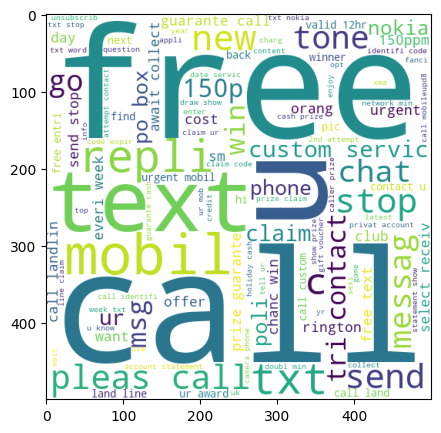

In [67]:
# SPAM wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")
plt.figure(figsize=(20,5))
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))
plt.imshow(spam_wc)

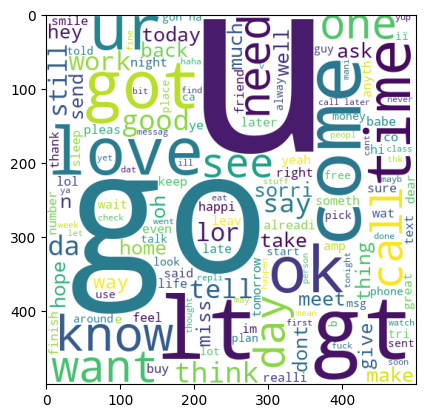

In [68]:
#HAM wordcloud
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))
plt.imshow(spam_wc)

In [69]:
spam_corpus=[]
for text in df[df["target"]==1]["transformed_text"].tolist():
    for word in text.split():
        spam_corpus.append(word)

len(spam_corpus)

11490

C:\Users\HP\AppData\Local\Temp\ipykernel_15928\3854955507.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq_df[0], y=word_freq_df[1],palette='Set2')


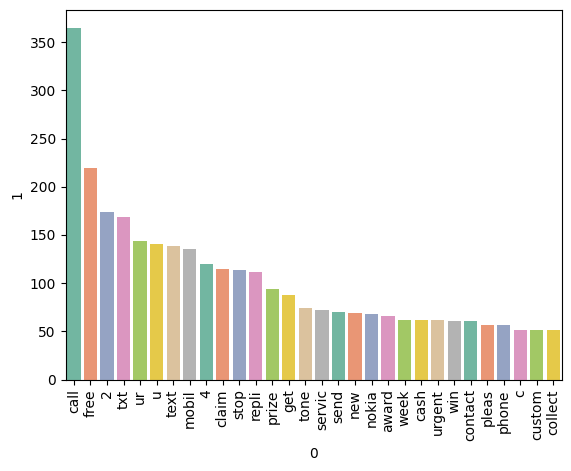

In [70]:
from collections import Counter
#  Counting the frequency of each word in the spam_corpus
word_counts_spam = Counter(spam_corpus)
# Converting the 30 most common words and their frequencies into a DataFrame
word_freq_df = pd.DataFrame(word_counts_spam.most_common(30))
# Creating a barplot of the 30 most common words and their frequencies
sns.barplot(x=word_freq_df[0], y=word_freq_df[1],palette='Set2')
plt.xticks(rotation="vertical")
plt.show()

In [71]:
ham_corpus=[]
for text in df[df["target"]==0]["transformed_text"].tolist():
    for word in text.split():
        ham_corpus.append(word)

len(ham_corpus)

38221

C:\Users\HP\AppData\Local\Temp\ipykernel_15928\1066144402.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq_df[0], y=word_freq_df[1],palette='Set2')


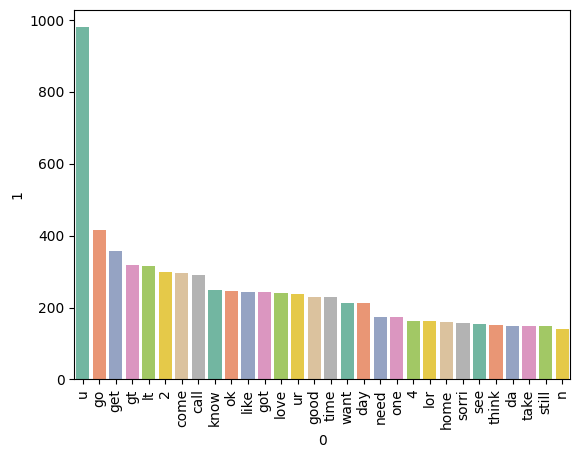

In [72]:
#  Counting the frequency of each word in the ham_corpus
word_counts_ham = Counter(ham_corpus)
# Converting the 30 most common words and their frequencies into a DataFrame
word_freq_df = pd.DataFrame(word_counts_ham.most_common(30))
# Creating a barplot of the 30 most common words and their frequencies
sns.barplot(x=word_freq_df[0], y=word_freq_df[1],palette='Set2')
plt.xticks(rotation="vertical")
plt.show()

Building the Model

In [73]:
# Seperating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df["transformed_text"],df["target"],test_size=0.3)

Logistic Regression

In [74]:
# Vectorize text data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(x_train)
X_test_tfidf = vectorizer.transform(x_test)

In [75]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()

In [76]:
logistic_model.fit(X_train_tfidf,y_train)

LogisticRegression()

In [77]:
# Testing the logistic_model
logistic_y_pred_train=logistic_model.predict(X_train_tfidf)
logistic_y_pred_test = logistic_model.predict(X_test_tfidf)

Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf,y_train)

RandomForestClassifier(random_state=42)

In [79]:
# Testing the rf_model
rf_y_pred_train=rf_model.predict(X_train_tfidf)
rf_y_pred_test = rf_model.predict(X_test_tfidf)

Naive Bayes Classifier

In [80]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train_tfidf,y_train)

MultinomialNB()

In [81]:
# Testing the nb_model
nb_y_pred_train=nb_model.predict(X_train_tfidf)
nb_y_pred_test = nb_model.predict(X_test_tfidf)

Support Vector Machine

In [82]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf,y_train)

SVC(kernel='linear', random_state=42)

In [83]:
# Testing the nb_model
svm_y_pred_train=svm_model.predict(X_train_tfidf)
svm_y_pred_test = svm_model.predict(X_test_tfidf)

Comparing results of training and testing accuracy across models

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [85]:
model_results = {
    "Model": ["Logistic Regression", "Naive Bayes", "Random Forest", "SVM (Linear Kernel)"],
    "Training Accuracy": [accuracy_score(y_train, logistic_y_pred_train), accuracy_score(y_train, nb_y_pred_train),
                          accuracy_score(y_train, rf_y_pred_train), accuracy_score(y_train, svm_y_pred_train)],
    "Testing Accuracy": [accuracy_score(y_test, logistic_y_pred_test), accuracy_score(y_test, nb_y_pred_test),
                         accuracy_score(y_test, rf_y_pred_test), accuracy_score(y_test, svm_y_pred_test)],
    "F1 Score (Test)": [f1_score(y_test, logistic_y_pred_test, average='weighted'),
                        f1_score(y_test, nb_y_pred_test, average='weighted'),
                        f1_score(y_test, rf_y_pred_test, average='weighted'),
                        f1_score(y_test, svm_y_pred_test, average='weighted')]}
model_results = pd.DataFrame(model_results)

In [86]:
model_results["Generalization Gap"] = model_results["Training Accuracy"] - model_results["Testing Accuracy"]
model_results

,Model,Training Accuracy,Testing Accuracy,F1 Score (Test),Generalization Gap
0,Logistic Regression,0.961538,0.960526,0.958166,0.001012
1,Naive Bayes,0.974359,0.964115,0.961789,0.010244
2,Random Forest,1.000000,0.975478,0.974506,0.024522
3,SVM (Linear Kernel),0.994872,0.982656,0.982232,0.012216


On comparison, it can be concluded that the SVM (Linear Kernel) model performs well on the dataset, with a minimal generalization gap between training and testing accuracy, and achieves a high F1 Score (Test).